# Amyloid Width Graphing (Interstrand Distance and Tilt)

-Nikos and David

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
plt.style.use('seaborn-notebook')
plt.style.use('seaborn-whitegrid')

### Read in Files

In [2]:
workdir = "/Users/davidboyer/Dropbox/Tau_Project_EISENBERG_LAB/amyloid_width/python/graphing/"
datadir = "/Users/davidboyer/Dropbox/Tau_Project_EISENBERG_LAB/amyloid_width/python/calculations/interstrand_tilt_radius/data/"
os.chdir(datadir)
filenames = glob.glob("*dist.csv")
filenames_tilt = glob.glob("*tilt.csv")
os.chdir(workdir)
dataframe = [pd.read_csv(f'{datadir}{f}', delimiter=',', skipinitialspace=True, header=None) for f in filenames]
dataframe_3d = pd.DataFrame([dataframe], columns=filenames)
dataframe_tilt = [pd.read_csv(f'{datadir}{f}', delimiter=',', skipinitialspace=True, header=None) for f in filenames_tilt]
dataframe_3d_tilt = pd.DataFrame([dataframe_tilt], columns=filenames_tilt)
helix = pd.read_csv("/Users/davidboyer/Dropbox/Tau_Project_EISENBERG_LAB/amyloid_width/width_pitch/helical_parameters.txt", delimiter='\t', skipinitialspace=True, header=None)
print(filenames)
dataframe_3d

['5o3t_origin_5layers_rad_dist.csv', '6peo_rad_dist.csv', '6lrq_origin_3layers_rad_dist.csv', '6vw2_rad_dist.csv', '6hud_origin_5layers_modified_rad_dist.csv', '6y1a_origin_8layers_rad_dist.csv', '6zrr_5layers_rad_dist.csv', '6cu7_5layers_rad_dist.csv', '6vps_origin_3layers_rad_dist.csv', '6gx5_origin_3layers_rad_dist.csv', '6wqk_rad_dist.csv', '6zcf_5layers_rad_dist.csv', '7kwz_5layers_rad_dist.csv', '6n37_5layers_rad_dist.csv', '7bx7_5layers_rad_dist.csv', '6xyq_origin_5layers_rad_dist.csv', '6cu8_5layers_rad_dist.csv', '6zrf_5layers_rad_dist.csv', '6sst_origin_5layers_rad_dist.csv', '6dso_origin_6layers_rad_dist.csv', '6ufr_origin_5layers_rad_dist.csv', '6lni_origin_5layers_rad_dist.csv', '6n3b_manual_rad_dist.csv', '6r4r_5layers_rad_dist.csv', '6zcg_5layers_rad_dist.csv', '6xyp_origin_5layers_rad_dist.csv', '5o3l_5layers_rad_dist.csv', '6zch_5layers_rad_dist.csv', '6l4s_origin_3layers_rad_dist.csv', '6ic3_origin_8layers_rad_dist.csv', '6ssx_origin_5layers_rad_dist.csv', '6l1u_5laye

,5o3t_origin_5layers_rad_dist.csv,6peo_rad_dist.csv,6lrq_origin_3layers_rad_dist.csv,6vw2_rad_dist.csv,6hud_origin_5layers_modified_rad_dist.csv,6y1a_origin_8layers_rad_dist.csv,6zrr_5layers_rad_dist.csv,6cu7_5layers_rad_dist.csv,6vps_origin_3layers_rad_dist.csv,6gx5_origin_3layers_rad_dist.csv,...,6qjq_origin_3layers_rad_dist.csv,6l1t_5layers_rad_dist.csv,6shs_5layers_rad_dist.csv,5w7v_3layers_rad_dist.csv,6pes_5chains_rad_dist.csv,6zrq_5layers_rad_dist.csv,6n3a-origin_IDfixed_rad_dist.csv,6mst_origin_6layers_rad_dist.csv,6xfm_5layers_rad_dist.csv,6xyo_origin_5layers_rad_dist.csv
0,0 1 2 3 4 5 ...,0 1 2 3 4 5 6 ...,0 1 2 3 4 5 6 ...,0 1 2 3 4 5 6 ...,0 1 2 3 4 5 6...,0 1 2 3 4 5 6...,0 1 2 3 4 5 6...,0 1 2 3 4 5 6 ...,0 1 2 3 4 5 6 ...,0 1 2 3 4 5 6...,...,0 1 2 3 4 5 6...,0 1 2 3 4 5 6...,0 1 2 3 4 5 6 ...,0 1 2 3 4 5 6 ...,0 1 2 3 4 5 6...,0 1 2 3 4 5 6 ...,0 1 2 3 4 5 6...,0 1 2 3 4 5 6 ...,0 1 2 3 4 5 6 ...,0 1 2 3 4 5 ...


### Functions

In [3]:
def get_radius(filename):
    return dataframe_3d[filename][0][0]

def get_radius_tilt(filename):
    return dataframe_3d_tilt[filename][0][0]

def get_interstrand(filename):
    return dataframe_3d[filename][0][1]

def get_tilt(filename):
    return dataframe_3d_tilt[filename][0][1]

def pred_interstrand(x, y, r):
    return np.sqrt( (2*(r**2)) * (1-np.cos(x*np.pi/180)) + (y**2))

def pred_tilt(x, y, r):
    return (180/np.pi)*np.arccos(((np.abs(y))/np.sqrt( (2*(r**2)) * (1-np.cos(x*np.pi/180)) + (y**2))))


Theo_interstrands = []
for i in range(len(dataframe)):
    temp = []
    name = dataframe[i][7][0]
    for k in range(len(helix[0])):
        if helix[0][k] == name:
            x = helix[1][k]
            y = helix[2][k]
    for j in range(len(dataframe[i])):
        temp.append( pred_interstrand(x, y, get_radius(filenames[i])[j]) )
    Theo_interstrands.append(temp)
    
Theo_tilt = []
for i in range(len(dataframe_tilt)):
    temp = []
    name = dataframe_tilt[i][5][0]
    for k in range(len(helix[0])):
        if helix[0][k] == name:
            x = helix[1][k]
            y = helix[2][k]
    for j in range(len(dataframe_tilt[i])):
        temp.append( pred_tilt(x, y, get_radius_tilt(filenames_tilt[i])[j]) )
    Theo_tilt.append(temp)

### Make All Plots (Interstrand Distance vs. Radius)

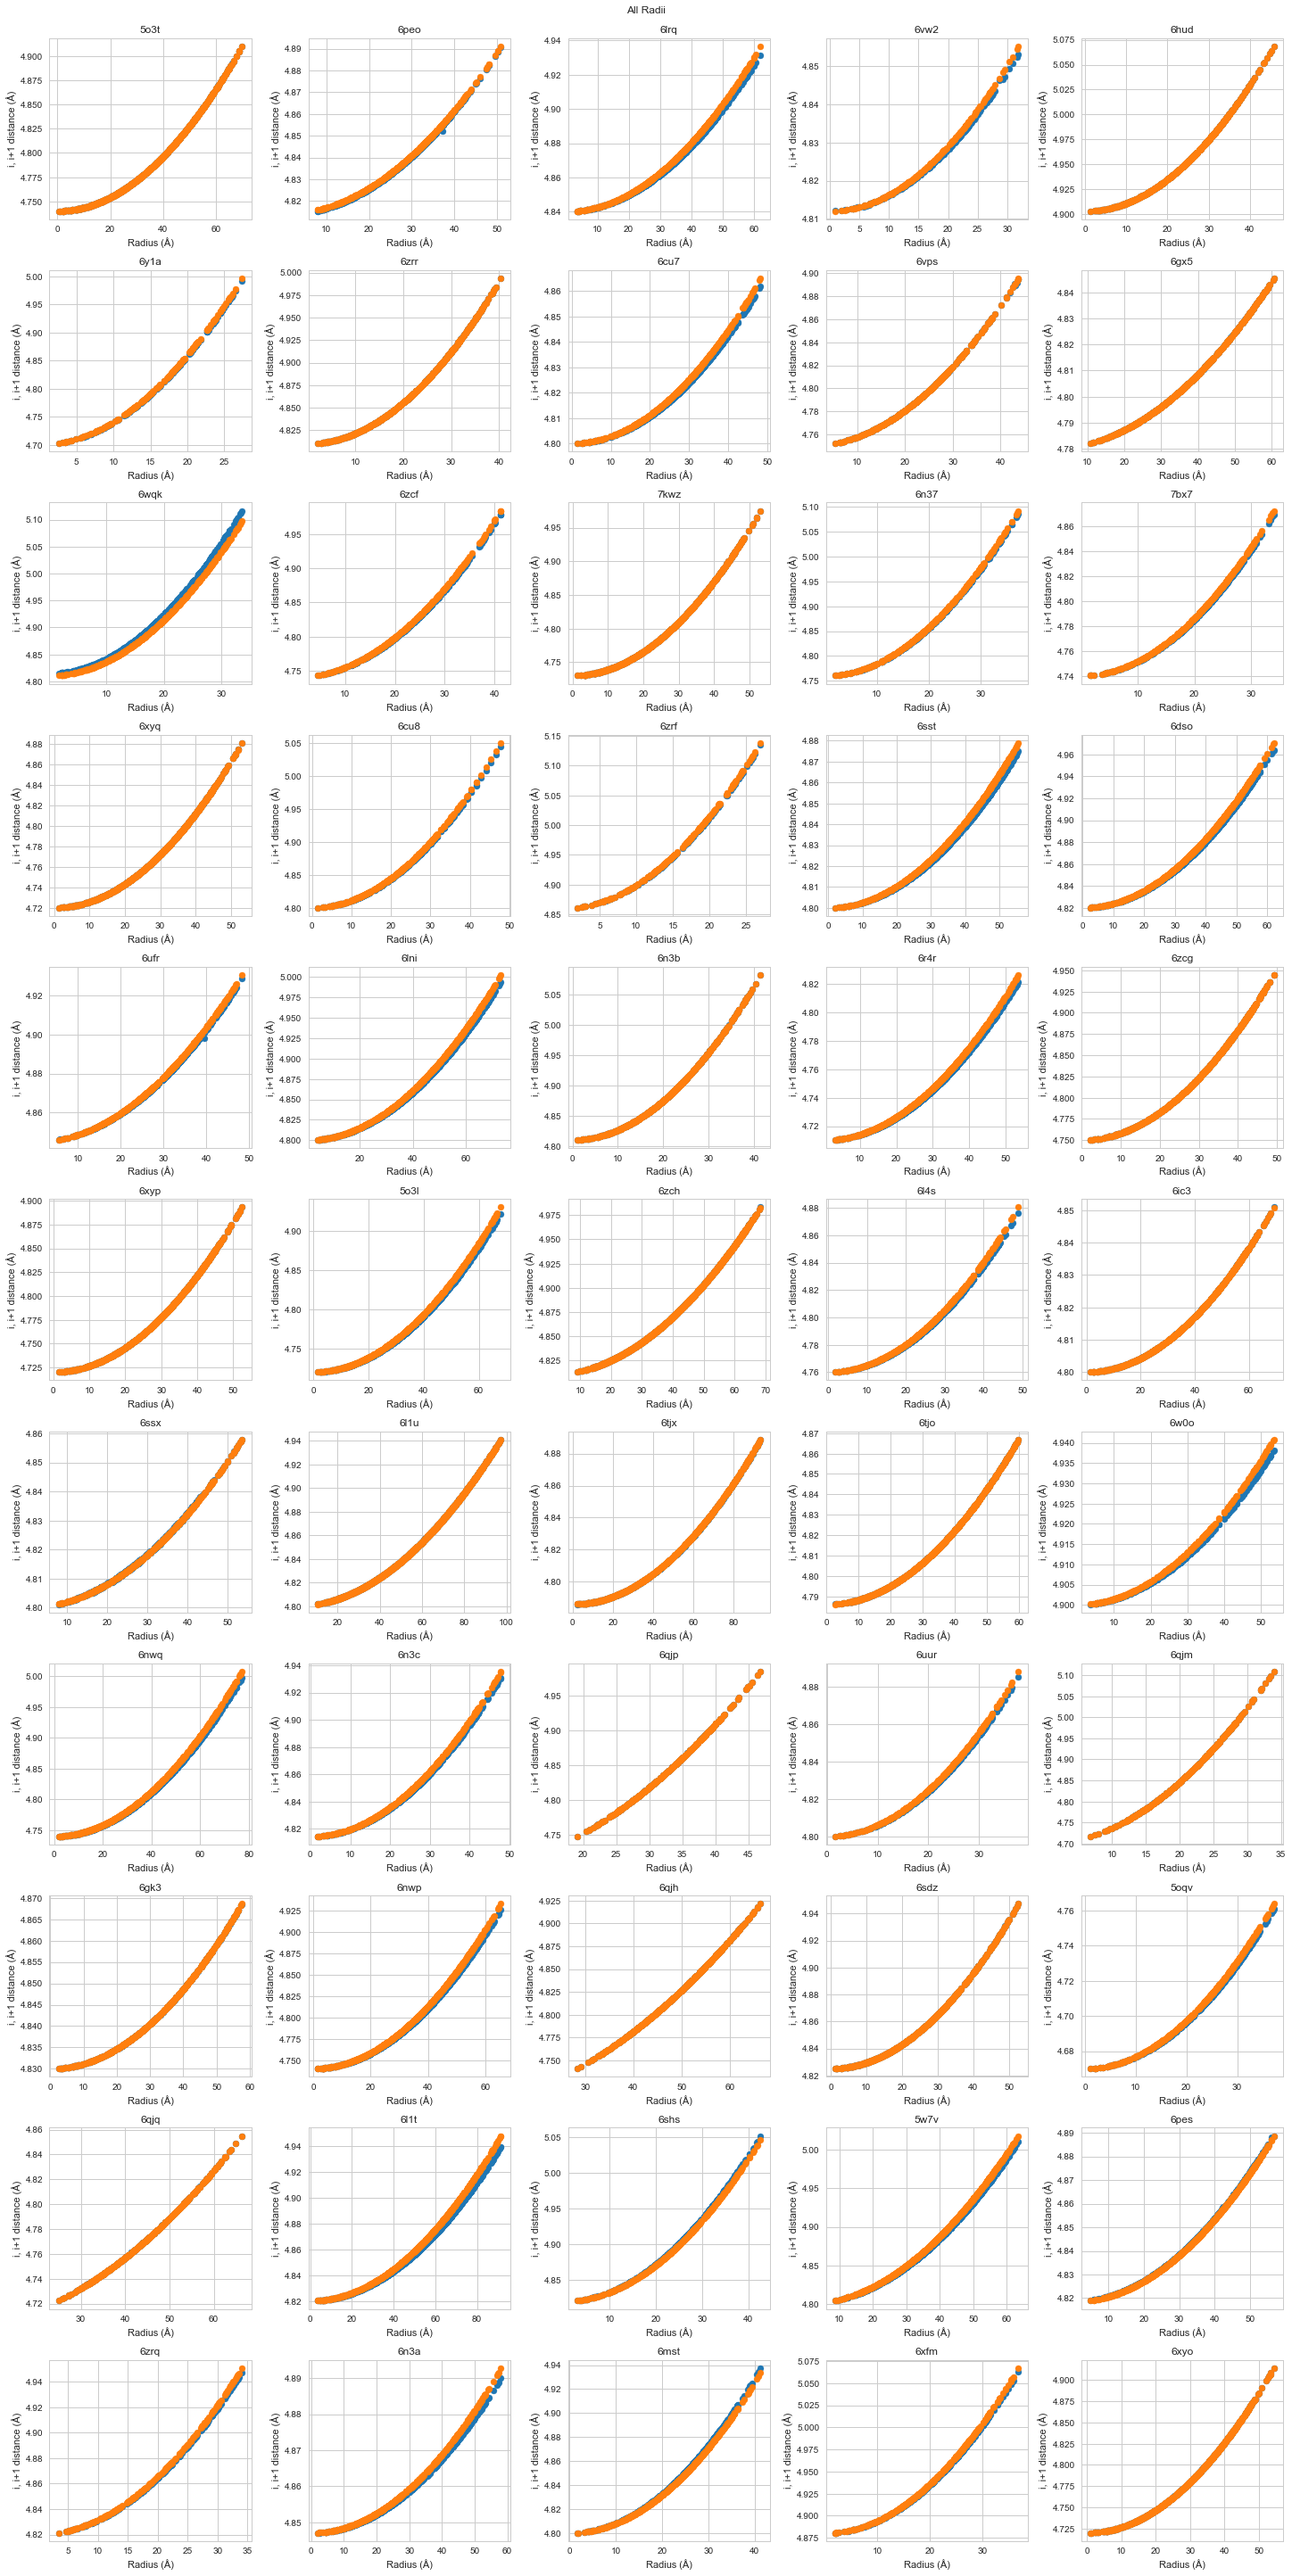

In [4]:
figsize = (20,40)
columns=5
rows= len(dataframe) // columns 

fig, ax = plt.subplots(rows, columns, figsize=figsize, constrained_layout=True)
fig.suptitle("All Radii")
for i in range(rows):
    for j in range(columns):
        k = i*columns+j
        ax[i,j].scatter(get_radius(filenames[k]), get_interstrand(filenames[k]))
        ax[i,j].scatter(get_radius(filenames[k]), Theo_interstrands[k])
        name = dataframe[k][7][0]
        ax[i,j].set_title(name)
        ax[i,j].set_xlabel("Radius (Å)")
        ax[i,j].set_ylabel("i, i+1 distance (Å)")

plt.show()

### Make All Plots (Tilt versus Radius)

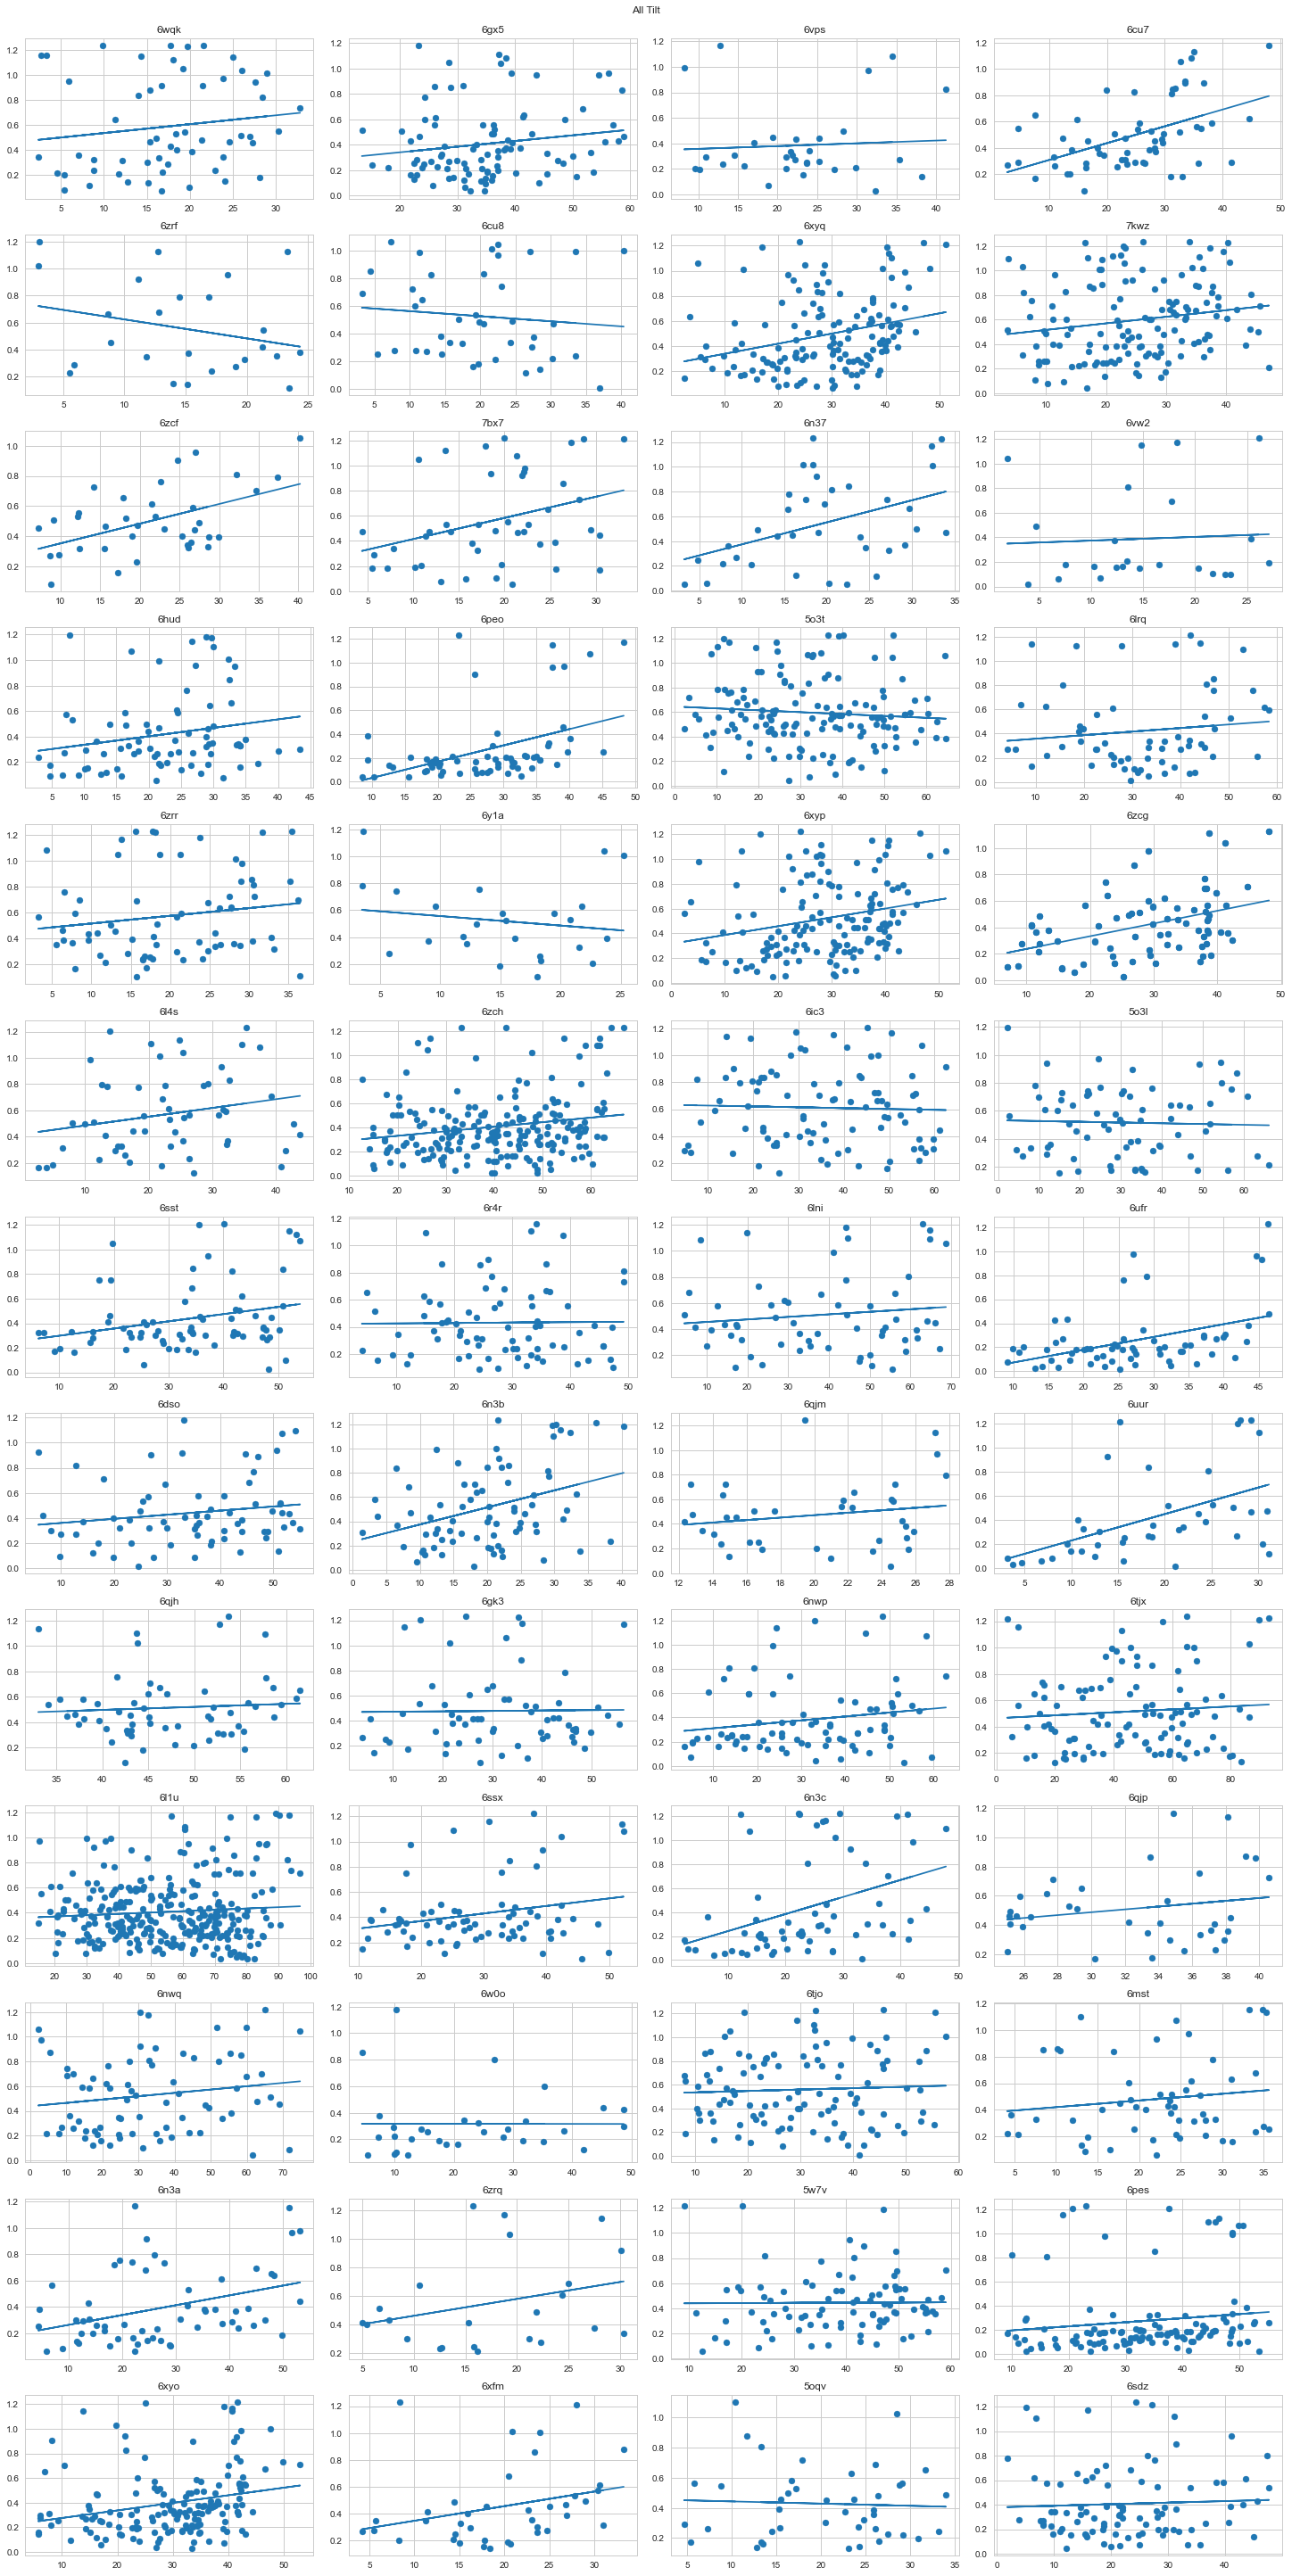

In [5]:
figsize = (20,40)
columns=4
rows= len(dataframe_tilt) // columns 

fig_tilt, ax_tilt = plt.subplots(rows, columns, figsize=figsize, constrained_layout=True)
fig_tilt.suptitle("All Tilt")
for i in range(rows):
    for j in range(columns):
        k = i*columns+j
        ax_tilt[i,j].scatter(get_radius_tilt(filenames_tilt[k]), get_tilt(filenames_tilt[k]))
        #ax_tilt[i,j].scatter(get_radius(filenames_tilt[k]), Theo_tilt[k])
        m, b = np.polyfit(get_radius_tilt(filenames_tilt[k]), get_tilt(filenames_tilt[k]), 1)
        ax_tilt[i,j].plot(get_radius_tilt(filenames_tilt[k]),m*get_radius_tilt(filenames_tilt[k])+b)
        name = dataframe_tilt[k][5][0]
        ax_tilt[i,j].set_title(name)
        
plt.show()

### Export SVG All Plots

In [6]:
plt.draw()
fig.savefig(f'{workdir}interstrand_rad.svg', bbox_inches='tight')

<Figure size 576x396 with 0 Axes>